# Ecuación del transporte de calor

## Forma explícita

### Ecuación de Transporte de Calor en 1D

A continuación se muestra un ejemplo de cómo resolver la ecuación de **transporte de calor** (o **difusión de calor**) en 1D usando un esquema de **diferencias finitas explícito**, empleando solamente las librerías **NumPy** y **Matplotlib**.

#### Planteamiento

La ecuación de difusión del calor en 1D está dada por:

$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$$

con **condiciones de frontera**:

$$
T(0,t) = 100, \quad T(L,t) = 100
$$

y **condición inicial**:

$$
T(x,0) = 20, \quad \text{para} \quad 0 < x < L.
$$

#### Esquema de Diferencias Finitas

El esquema explícito en diferencias finitas se define (para cada paso de tiempo $n$ y punto espacial $i$) como:

$$
T_i^{n+1} = T_i^n + \lambda (T_{i+1}^n - 2T_i^n + T_{i-1}^n)
$$

donde:

$$
\lambda = \frac{\alpha \, \Delta t}{\Delta x^2}.
$$

Para asegurar **estabilidad** en el esquema explícito, se requiere que:

$$
\lambda \leq \frac{1}{2}.
$$

### Implementación

En el siguiente código:

- Se define $ \Delta x $ en la lista $ [0.1, 0.05, 0.01] $.
- Se toma $ \alpha = 1 $ (por simplicidad).
- Se ajusta $ \Delta t $ de modo que $ \lambda = 0.5 $.
- Se corre la simulación hasta $ t_{\max} = 1000 \text{s} $.
- Se grafican las soluciones finales para cada $ \Delta x $.

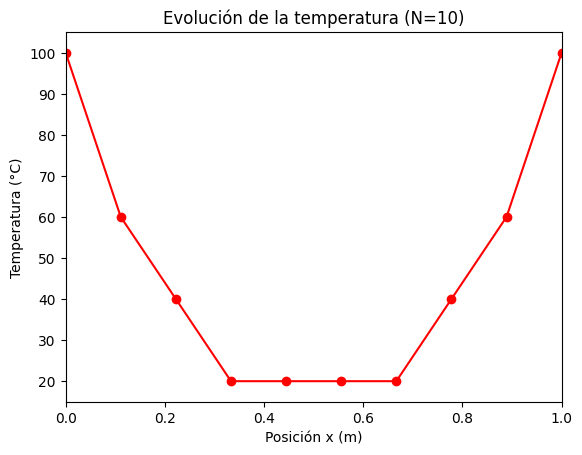

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1.0        # Longitud de la barra
N = 10         # Número de nodos (incluyendo extremos)
alpha = 1.0    # Difusividad térmica
T_left = 100   # Temperatura en x=0
T_right = 100  # Temperatura en x=L
T_init = 20    # Temperatura inicial en la barra
t_max = 1000   # Tiempo total de simulación (s)

# Cálculo de dx y dt para mantener la estabilidad (lambda <= 0.5)
dx = L / (N - 1)
dt = 0.5 * dx**2 / alpha
lam = alpha * dt / dx**2

# Cantidad total de pasos de tiempo
n_steps = int(t_max / dt)

# Eje espacial
x = np.linspace(0, L, N)

# Vector de temperatura
T = np.ones(N) * T_init
T[0] = T_left
T[-1] = T_right

# -- Configuración de la figura y la animación --
fig, ax = plt.subplots()
ax.set_title(f"Evolución de la temperatura (N={N})")
ax.set_xlabel("Posición x (m)")
ax.set_ylabel("Temperatura (°C)")

# Límites para la gráfica (ajustar según necesidad)
ax.set_xlim(0, L)
ax.set_ylim(T_init - 5, T_right + 5)

# Línea que se actualizará en cada frame
(line,) = ax.plot(x, T, marker='o', color='red')

def update(frame):
    """
    Esta función se llama en cada frame de la animación.
    Realiza un paso de tiempo en el esquema explícito y
    actualiza la línea con los nuevos valores de T.
    """
    global T
    T_old = T.copy()
    for i in range(1, N-1):
        T[i] = T_old[i] + lam*(T_old[i+1] - 2*T_old[i] + T_old[i-1])
    # Reaplicamos las fronteras (por precaución)
    T[0] = T_left
    T[-1] = T_right
    
    line.set_ydata(T)
    return (line,)

# Creamos la animación con FuncAnimation
ani = FuncAnimation(
    fig,
    update,
    frames=range(n_steps),  # Itera en todos los pasos de tiempo
    interval=5,             # Intervalo en ms entre frames (ajusta a tu gusto)
    blit=True               # Optimización de dibujo
)

plt.show()

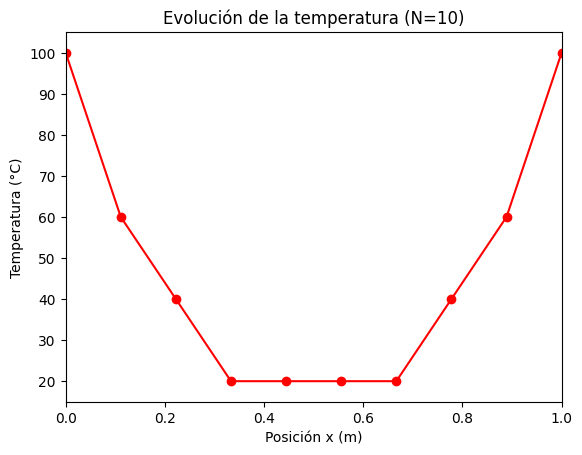

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1.0        # Longitud de la barra
N = 10         # Número de nodos (incluyendo extremos)
alpha = 1.0    # Difusividad térmica
T_left = 100   # Temperatura en x=0
T_right = 100  # Temperatura en x=L
T_init = 20    # Temperatura inicial en la barra
t_max = 1000   # Tiempo total de simulación (s)

# Cálculo de dx y dt para mantener la estabilidad (lambda <= 0.5)
dx = L / (N - 1)
dt = 0.5 * dx**2 / alpha
lam = alpha * dt / dx**2

# Cantidad total de pasos de tiempo
n_steps = int(t_max / dt)

# Eje espacial
x = np.linspace(0, L, N)

# Vector de temperatura
T = np.ones(N) * T_init
T[0] = T_left
T[-1] = T_right

# -- Configuración de la figura y la animación --
fig, ax = plt.subplots()
ax.set_title(f"Evolución de la temperatura (N={N})")
ax.set_xlabel("Posición x (m)")
ax.set_ylabel("Temperatura (°C)")

# Límites para la gráfica (ajustar según necesidad)
ax.set_xlim(0, L)
ax.set_ylim(T_init - 5, T_right + 5)

# Línea que se actualizará en cada frame
(line,) = ax.plot(x, T, marker='o', color='red')

def update(frame):
    """
    Esta función se llama en cada frame de la animación.
    Realiza un paso de tiempo en el esquema explícito y
    actualiza la línea con los nuevos valores de T.
    """
    global T
    T_old = T.copy()
    for i in range(1, N-1):
        T[i] = T_old[i] + lam * (T_old[i+1] - 2*T_old[i] + T_old[i-1])
    # Reaplicamos las fronteras (por precaución)
    T[0] = T_left
    T[-1] = T_right
    
    line.set_ydata(T)  # Actualiza los datos de la línea
    return (line,)

# Creamos la animación con FuncAnimation
ani = FuncAnimation(
    fig,
    update,
    frames=n_steps,  # Itera en todos los pasos de tiempo
    interval=50,     # Intervalo en ms entre frames (ajusta a tu gusto)
    blit=True        # Optimización de dibujo
)

# Mostrar la animación
plt.show()

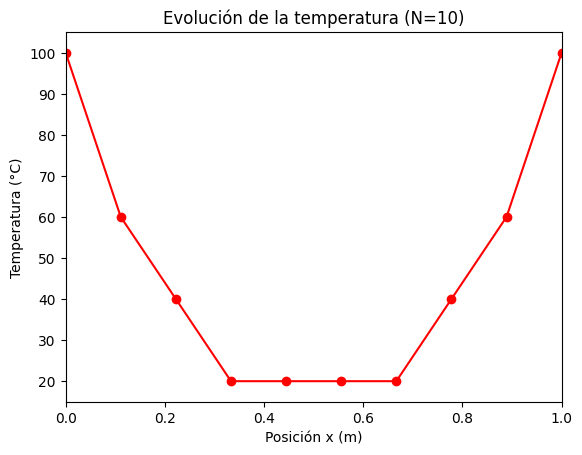

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1.0        # Longitud de la barra
N = 10         # Número de nodos (incluyendo extremos)
alpha = 1.0    # Difusividad térmica
T_left = 100   # Temperatura en x=0
T_right = 100  # Temperatura en x=L
T_init = 20    # Temperatura inicial en la barra
t_max = 1000   # Tiempo total de simulación (s)

# Cálculo de dx y dt para mantener la estabilidad (lambda <= 0.5)
dx = L / (N - 1)
dt = 0.5 * dx**2 / alpha
lam = alpha * dt / dx**2

# Cantidad total de pasos de tiempo
n_steps = int(t_max / dt)

# Eje espacial
x = np.linspace(0, L, N)

# Vector de temperatura
T = np.ones(N) * T_init
T[0] = T_left
T[-1] = T_right

# -- Configuración de la figura y la animación --
fig, ax = plt.subplots()
ax.set_title(f"Evolución de la temperatura (N={N})")
ax.set_xlabel("Posición x (m)")
ax.set_ylabel("Temperatura (°C)")

# Límites para la gráfica (ajustar según necesidad)
ax.set_xlim(0, L)
ax.set_ylim(T_init - 5, T_right + 5)

# Línea que se actualizará en cada frame
(line,) = ax.plot(x, T, marker='o', color='red')

def update(frame):
    """
    Esta función se llama en cada frame de la animación.
    Realiza un paso de tiempo en el esquema explícito y
    actualiza la línea con los nuevos valores de T.
    """
    global T
    T_old = T.copy()
    for i in range(1, N-1):
        T[i] = T_old[i] + lam * (T_old[i+1] - 2*T_old[i] + T_old[i-1])
    # Reaplicamos las fronteras (por precaución)
    T[0] = T_left
    T[-1] = T_right
    
    line.set_ydata(T)  # Actualiza los datos de la línea
    return (line,)

# Creamos la animación con FuncAnimation
ani = FuncAnimation(
    fig,
    update,
    frames=n_steps,  # Itera en todos los pasos de tiempo
    interval=50,     # Intervalo en ms entre frames (ajusta a tu gusto)
    blit=True,       # Optimización de dibujo
    repeat=True     # Evita que la animación se repita automáticamente
)

# Mostrar la animación
plt.show()

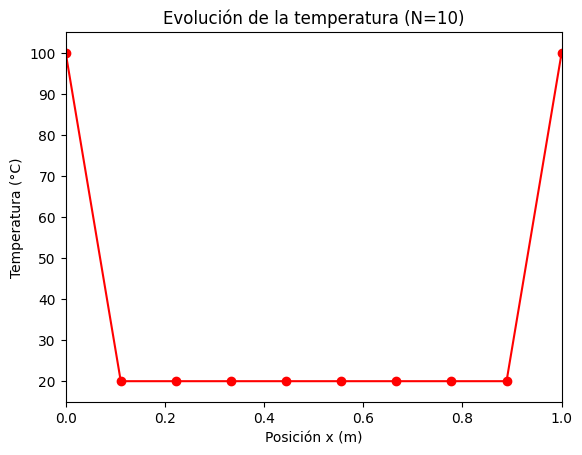

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1.0        # Longitud de la barra
N = 10         # Número de nodos (incluyendo extremos)
alpha = 1.0    # Difusividad térmica
T_left = 100   # Temperatura en x=0
T_right = 100  # Temperatura en x=L
T_init = 20    # Temperatura inicial en la barra
t_max = 1000   # Tiempo total de simulación

# Cálculo de dx y dt (para estabilidad: lambda <= 0.5)
dx = L / (N - 1)
dt = 0.5 * dx**2 / alpha
lam = alpha * dt / dx**2

# Número total de pasos
n_steps = int(t_max / dt)

# Dominio espacial
x = np.linspace(0, L, N)
# Estado inicial de la temperatura
T = np.ones(N) * T_init
T[0] = T_left
T[-1] = T_right

# Configuración de la figura
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(T_init - 5, T_right + 5)
ax.set_title("Evolución de la temperatura (N=10)")
ax.set_xlabel("Posición x (m)")
ax.set_ylabel("Temperatura (°C)")

# Línea de la gráfica
(line,) = ax.plot(x, T, marker='o', color='red')

def update(frame):
    global T
    T_old = T.copy()
    for i in range(1, N-1):
        T[i] = T_old[i] + lam*(T_old[i+1] - 2*T_old[i] + T_old[i-1])
    T[0] = T_left
    T[-1] = T_right
    line.set_ydata(T)
    return line,

# Crear animación con un intervalo mayor (por ejemplo, 1000 ms)
ani = FuncAnimation(fig, update, frames=range(n_steps), interval=100, blit=False)

plt.show()

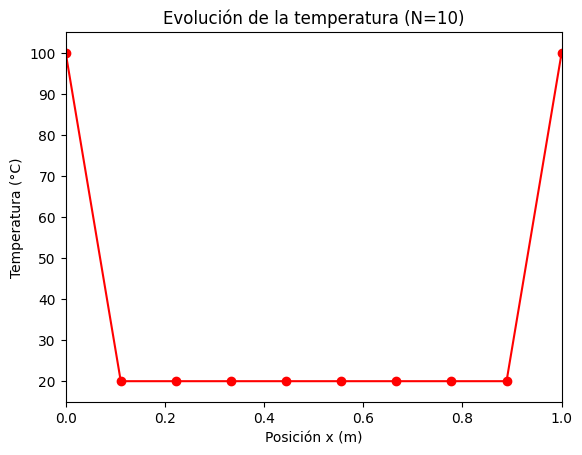

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animar_temperatura(L=1.0, N=10, alpha=1.0, T_left=100, T_right=100, T_init=20, t_max=1000):
    """
    Anima la evolución de la temperatura en 1D usando el método explícito de diferencias finitas.
    
    Parámetros:
      L: Longitud de la barra.
      N: Número de nodos (incluyendo extremos).
      alpha: Difusividad térmica.
      T_left: Temperatura en el extremo izquierdo (x=0).
      T_right: Temperatura en el extremo derecho (x=L).
      T_init: Temperatura inicial en el interior.
      t_max: Tiempo total de simulación.
    """
    # Cálculo de dx y dt para estabilidad (lambda <= 0.5)
    dx = L / (N - 1)
    dt = 0.5 * dx**2 / alpha
    lam = alpha * dt / dx**2

    # Número total de pasos
    n_steps = int(t_max / dt)

    # Dominio espacial
    x = np.linspace(0, L, N)

    # Estado inicial de la temperatura
    T = np.ones(N) * T_init
    T[0] = T_left
    T[-1] = T_right

    # Configuración de la figura
    fig, ax = plt.subplots()
    ax.set_xlim(0, L)
    ax.set_ylim(T_init - 5, T_right + 5)
    ax.set_title("Evolución de la temperatura (N=10)")
    ax.set_xlabel("Posición x (m)")
    ax.set_ylabel("Temperatura (°C)")
    (line,) = ax.plot(x, T, marker='o', color='red')

    # Función de actualización para cada frame
    def update(frame):
        nonlocal T
        T_old = T.copy()
        for i in range(1, N-1):
            T[i] = T_old[i] + lam * (T_old[i+1] - 2*T_old[i] + T_old[i-1])
        T[0] = T_left
        T[-1] = T_right
        line.set_ydata(T)
        return line,

    # Creación de la animación (ajusta el intervalo según tu preferencia)
    ani = FuncAnimation(fig, update, frames=range(n_steps), interval=1000, blit=False)
    plt.show()
    return ani

# Llamada a la función de animación
ani = animar_temperatura()
